Author: **Andy Tzanidakis**

Here we test our various time-series evaluation and search criteria.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams
rcParams['savefig.dpi'] = 550
rcParams['font.size'] = 20
plt.rc('font', family='serif')
from pathlib import Path
import sys

path_root = Path('../dipper/')
sys.path.append(str(path_root))

# custom modules
import tools as tool_lc
import DiperDet as dipdet

In [233]:
# generate fake data

time, mags, mag_err = [], [], []
for _ in range(1):
    N = np.random.randint(50, 250)
    time.append(np.random.randint(10_000, 50_000, N)+ np.random.normal(0, 350, N))
    mags.append(np.zeros(N) + 17 + np.random.normal(0, 0.01, N))
    mag_err.append(np.zeros(N) + abs(np.random.normal(0, 0.001, N)))

In [234]:
time = np.concatenate(time)
mags = np.concatenate(mags)
mag_err = np.concatenate(mag_err)

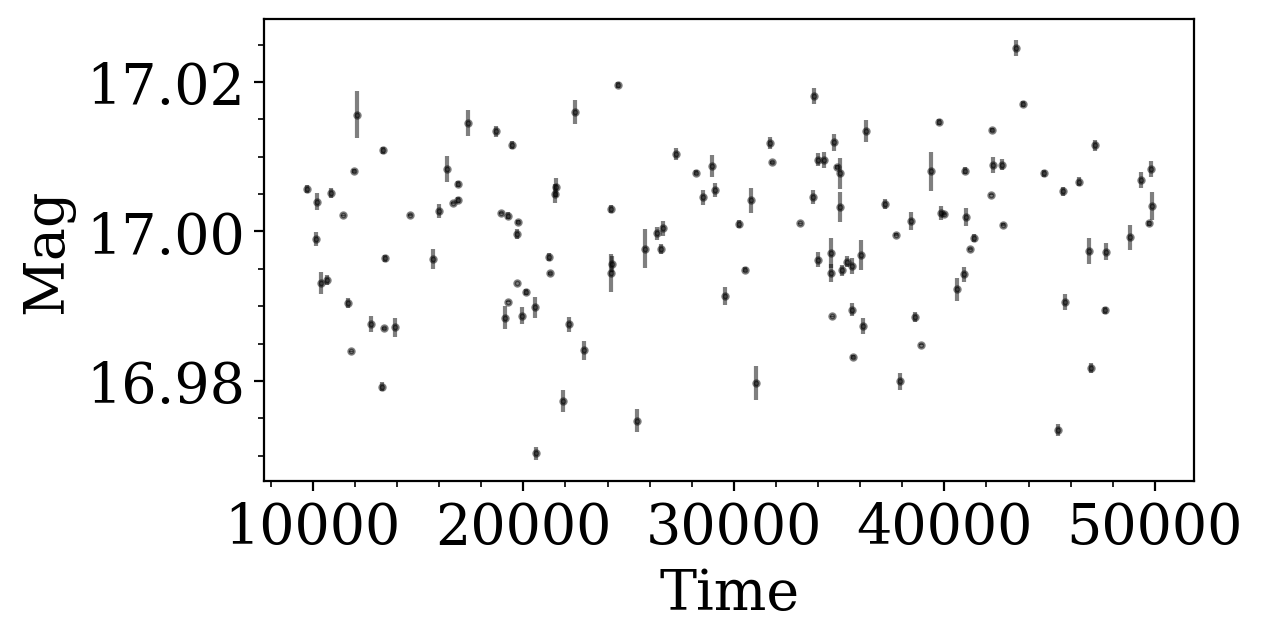

In [235]:
plt.figure(figsize=(6,3))
plt.errorbar(time, mags, yerr=mag_err, fmt='o', color='k', ms=2, alpha=0.5)
plt.ylabel("Mag")
plt.xlabel("Time")
plt.minorticks_on()

In [236]:
# calculate running deviation
_d = tool_lc.deviation(mags, mag_err)

Text(0.5, 0, 'd$_{i}$')

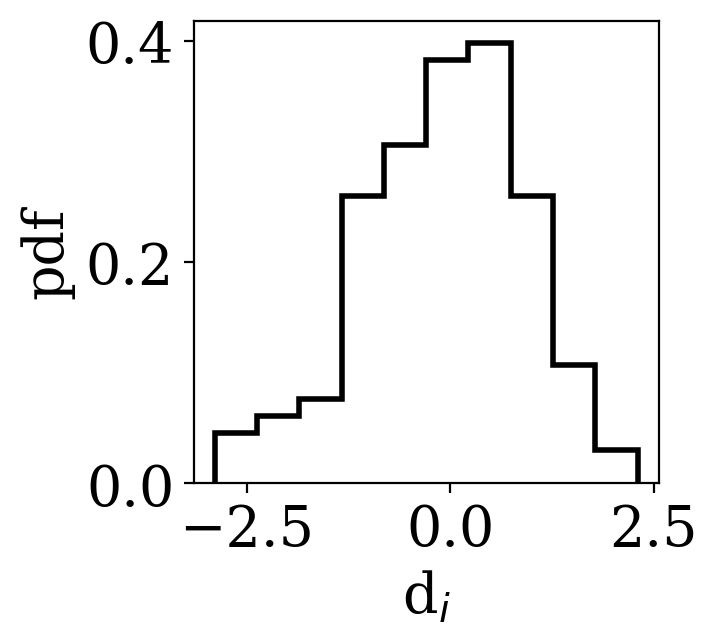

In [237]:
plt.figure(figsize=(3,3))
_ = plt.hist(_d, bins='fd',
 histtype='step', color='k', lw=2, density=True)
plt.ylabel("pdf")
plt.xlabel("d$_{i}$")

In [238]:
from scipy.stats import kstest

In [239]:
%%time
ksres = kstest(_d, 'norm')
print (f"stat:{ksres.statistic:.2f}, p-value:{ksres.pvalue:.2f}")
# we fail to reject the null hypothesis that the data is normally distributed :) 

stat:0.06, p-value:0.82
CPU times: user 5.05 ms, sys: 11.1 ms, total: 16.1 ms
Wall time: 11.8 ms


In [267]:
mod = tool_lc.ggd(time[np.argsort(time)], 20_000, 1000, 3, 18, 1500) + np.random.normal(0, 0.1, N)

<ErrorbarContainer object of 3 artists>

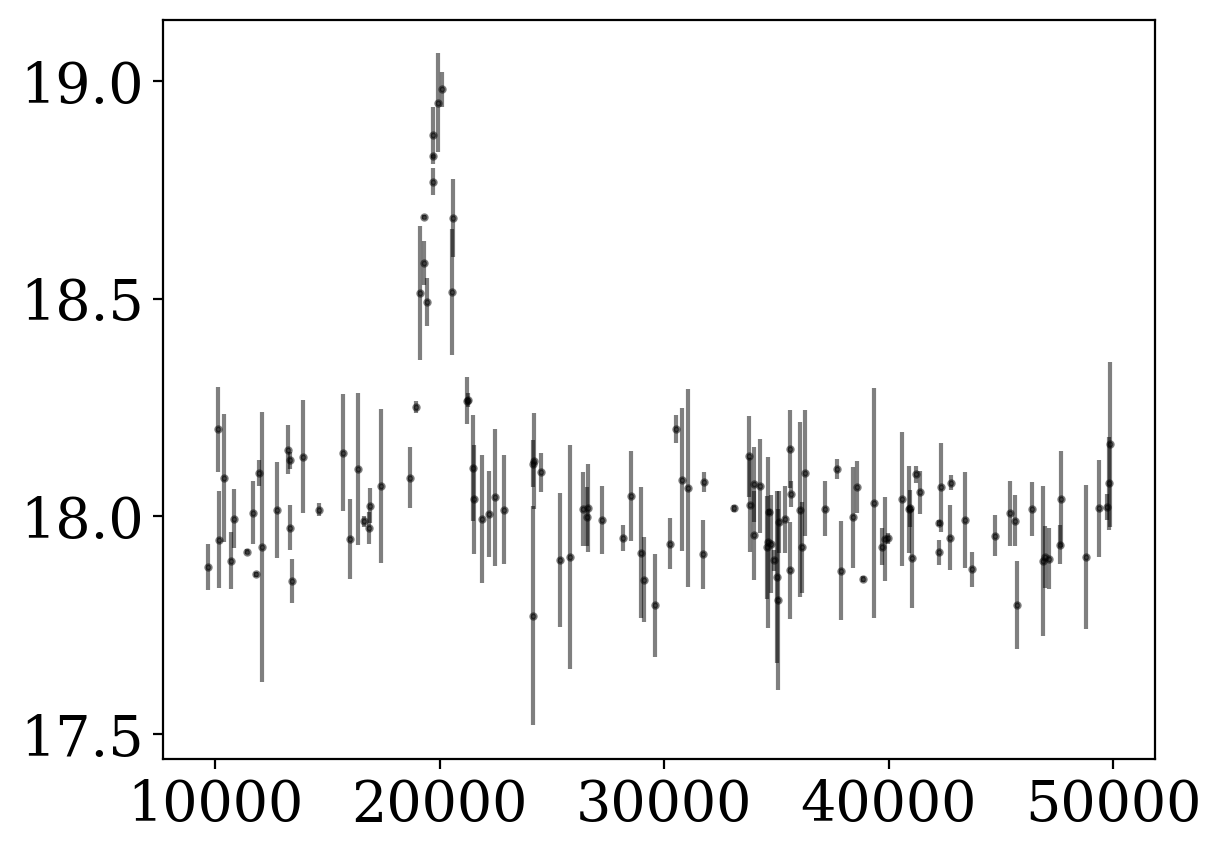

In [268]:
plt.errorbar(time[np.argsort(time)], mod, yerr=100*mag_err[np.argsort(time)], fmt='o', color='k', ms=2, alpha=0.5)

In [269]:
x, y, z = time[np.argsort(time)], mod, 100*mag_err[np.argsort(time)]

In [270]:
dd = tool_lc.deviation(y, z)

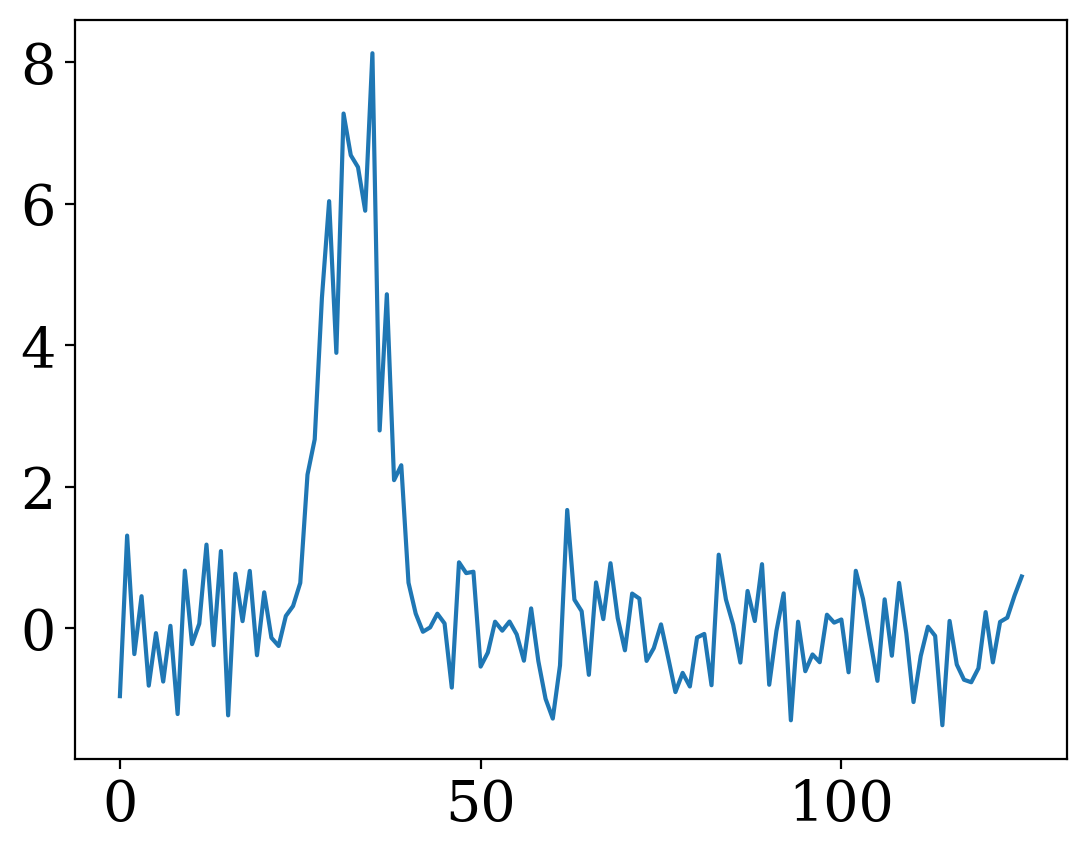

In [271]:
plt.plot(dd)

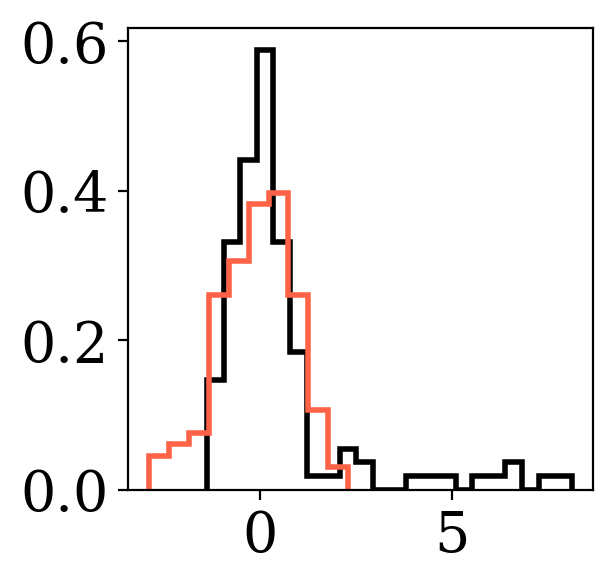

In [272]:
plt.figure(figsize=(3,3))
_ = plt.hist(dd, bins='fd', histtype='step', color='k', lw=2, density=True)
_ = plt.hist(_d, bins='fd', histtype='step', color='tomato', lw=2, density=True)

In [273]:
kstest(dd, 'norm')

KstestResult(statistic=0.12911181668462654, pvalue=0.02726012312208962, statistic_location=-0.8396925784624886, statistic_sign=-1)